<a href="https://colab.research.google.com/github/mahikajain20/Data-Project-Supervised-Learning/blob/main/notebooks/1-preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install openai
!pip install huggingface_hub
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import transformers as tr
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import hamming_loss, f1_score
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import xml.etree.ElementTree as ET
from huggingface_hub import HfApi
from huggingface_hub import HfFolder
import os
import google.generativeai as genai
import openai
import requests
import getpass
import warnings
warnings.filterwarnings('ignore')

from datasets import load_dataset
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer
import re
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


I loaded a lot of libraries as I was doing a different project using drug effect nlp analysis and integrated openai api and gemini api into it but the computational time was out of bounds for this project and my computer. Then I decided to shift to a sentiment analysis, which I will be performing using a series of notebooks.

This notebook is one of the most crucial steps of any analysis, the preprocessing. For any model to understand and perform calculations on text data, the text has to be cleaned and tokenized first. Then the stop words will be removed and a new dataframe will be used in the next parts of the analysis.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import userdata
hf_token = userdata.get('hf_token')

In [4]:
ds = load_dataset('imdb')

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

## Exploring the dataset

In [6]:
print(ds['train'][:3])

{'text': ['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far b

In [7]:
ds_train = pd.DataFrame(ds['train'])
print(ds_train['label'].value_counts(normalize=True))

label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [8]:
ds_test = pd.DataFrame(ds['test'])
print(ds_test['label'].value_counts(normalize=True))

label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [9]:
#Checking for nulls
ds_train.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
ds_test.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
# assign the splits
train = Dataset.from_pandas(ds_train)
test = Dataset.from_pandas(ds_test)
# reconstruct both datasets into a Dataset Dict object
new_ds = DatasetDict(
    {
        'train': train,
        'test': test
    }
)

In [11]:
new_ds #Might be needed later

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
})


Text length statistics (train set):
count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
Name: text_length, dtype: float64


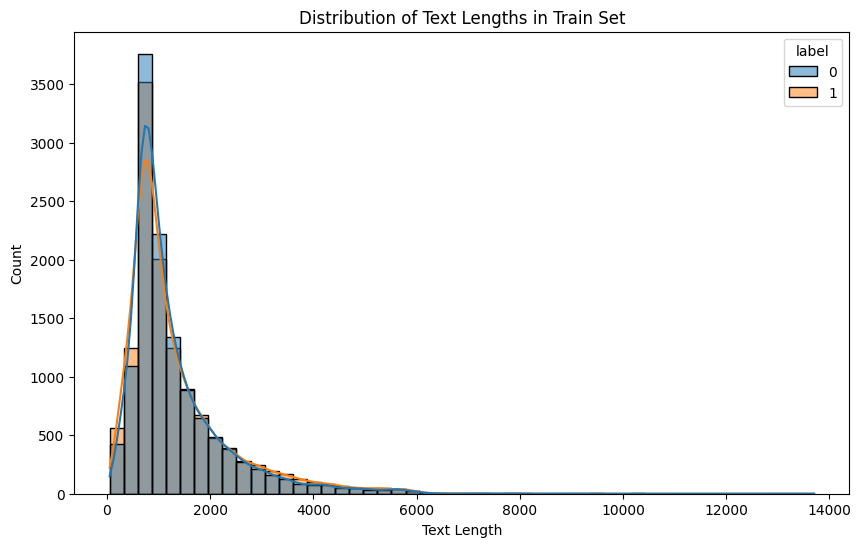

In [12]:
# Text length statistics
ds_train['text_length'] = ds_train['text'].apply(len)
ds_test['text_length'] = ds_test['text'].apply(len)

print("\nText length statistics (train set):")
print(ds_train['text_length'].describe())

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=ds_train, x='text_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Text Lengths in Train Set')
plt.xlabel('Text Length')
plt.show()

Now that the data has been explored and checked for nulls, I will move on to the next stage of preprocessing and apply tokenization and cleaning to both the train and the test sets.


## CLeaning, Tokenization, Stop Word removal

In [49]:
def clean(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Replace contractions
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)

    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z.,!? ]+", "", text)
    # Separate punctuation from words
    text = text.lower()
    alphabet = 'abcdefghijklmnopqrstuvwxyz '
    text = ''.join([char if char in alphabet else ' ' for char in text])
    return ' '.join(text.split())

This function is manually removing the punctuation and the special characters, extra spaces, html tags from the reviews

In [53]:
def clean_and_tokenize(text):
    text = clean(text)
    # Tokenize
    tokens = text.split()

    return tokens

This function is using the cleaning function and using .split() to tokenize the reviews.

In [54]:
# Apply cleaning and tokenization to both train and test sets
ds_train['text_processed'] = ds_train['text'].apply(clean_and_tokenize)
ds_test['text_processed'] = ds_test['text'].apply(clean_and_tokenize)

In [55]:
# Print a sample to verify
print("Sample from train set:")
print(ds_train['text_processed'].iloc[0][:20])  # Print first 20 tokens of the first sample
print("\nSample from test set:")
print(ds_test['text_processed'].iloc[0][:20])  # Print first 20 tokens of the first sample

Sample from train set:
['i', 'rented', 'i', 'am', 'curiousyellow', 'from', 'my', 'video', 'store', 'because', 'of', 'all', 'the', 'controversy', 'that', 'surrounded', 'it', 'when', 'it', 'was']

Sample from test set:
['i', 'love', 'scifi', 'and', 'am', 'willing', 'to', 'put', 'up', 'with', 'a', 'lot', 'scifi', 'moviestv', 'are', 'usually', 'underfunded', 'underappreciated', 'and', 'misunderstood']


In [56]:
#Numbers
print(ds_train['text_processed'].apply(lambda x: len(x)).describe())
print(ds_test['text_processed'].apply(lambda x: len(x)).describe())

count    25000.000000
mean       234.508160
std        174.129444
min         10.000000
25%        128.000000
50%        175.000000
75%        284.000000
max       2474.000000
Name: text_processed, dtype: float64
count    25000.000000
mean       229.213080
std        169.134709
min          6.000000
25%        126.000000
50%        173.000000
75%        278.000000
max       2275.000000
Name: text_processed, dtype: float64


In [57]:
#Stopword removal
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text = [token for token in text if token not in stop_words]
    return text

In [58]:
#Applying stop word function
ds_train['text_processed'] = ds_train['text_processed'].apply(remove_stopwords)
ds_test['text_processed'] = ds_test['text_processed'].apply(remove_stopwords)

In [59]:
#Numbers
print(ds_train['text_processed'].apply(lambda x: len(x)).describe())
print(ds_test['text_processed'].apply(lambda x: len(x)).describe())

count    25000.00000
mean       118.38708
std         89.46980
min          4.00000
25%         63.00000
50%         88.00000
75%        144.00000
max       1409.00000
Name: text_processed, dtype: float64
count    25000.000000
mean       115.678840
std         87.115608
min          3.000000
25%         62.000000
50%         86.000000
75%        140.000000
max       1130.000000
Name: text_processed, dtype: float64


The descriptors of the two datasets after the cleaning and tokenization vs after stop word removal show that:


**Before Stop Word Removal:**

train set:

Mean: 234.51 words
Median (50%): 175 words
Range: 10 to 2474 words

test set

Mean: 229.21 words
Median (50%): 173 words
Range: 6 to 2275 words



**After Stop Word Removal:**

train set:

Mean: 118.39 words
Median (50%): 88 words
Range: 4 to 1409 words

test set:


Mean: 115.68 words
Median (50%): 86 words
Range: 3 to 1130 words


**Interpretation:**

Consistency between datasets: Both datasets show similar characteristics before and after stop word removal, suggesting they are drawn from the same distribution. This is good for model training and evaluation.

**Impact of stop word removal:**

The mean number of words roughly halved (e.g., from 234.51 to 118.39 in Dataset 1).

The maximum length of reviews decreased significantly (e.g., from 2474 to 1409 in Dataset 1).

This suggests that stop words made up about 50% of the words in the reviews.



---



Distribution skew: In all cases, the mean is higher than the median, indicating a right-skewed distribution. This suggests there are some very long reviews that pull the average up.

Variability: The standard deviation is quite large relative to the mean, indicating high variability in review lengths.

Minimum lengths: Some reviews are very short, with as few as 3-4 words after stop word removal.

Outliers: There are some extremely long reviews (e.g., 1409 words after stop word removal), which could potentially impact model performance.


---



These insights suggest that:

- The datasets are suitable for model training and evaluation.

- Stop word removal was effective in reducing noise.
You might consider strategies to handle very short and very long reviews in your preprocessing pipeline.

- The right-skewed distribution might influence model performance, so techniques like log-transformation of review lengths or length-based features might be worth exploring.

## Vocabulary Analysis

I will be doing a vocabulary analysis as part of the EDA process to visualize the frequency of words in the test and train datasets.

In [60]:

def analyze_vocabulary(dataset, name):
    # Flatten the list of tokens
    all_words = [word for text in dataset['text_processed'] for word in text]
    word_freq = Counter(all_words)

    print(f"Analysis for {name} dataset:")
    print("Total unique words:", len(word_freq))
    print("\nMost common words:")
    print(word_freq.most_common(20))

    # Generate and display word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of IMDB Reviews ({name} set)')
    plt.show()


Analysis for Train dataset:
Total unique words: 96735

Most common words:
[('movie', 43386), ('film', 39444), ('one', 26078), ('like', 19748), ('would', 15738), ('good', 14803), ('even', 12569), ('time', 12210), ('story', 11761), ('really', 11717), ('see', 11306), ('much', 9693), ('well', 9690), ('could', 9400), ('get', 9259), ('people', 9243), ('also', 9141), ('bad', 9129), ('great', 9004), ('first', 8898)]


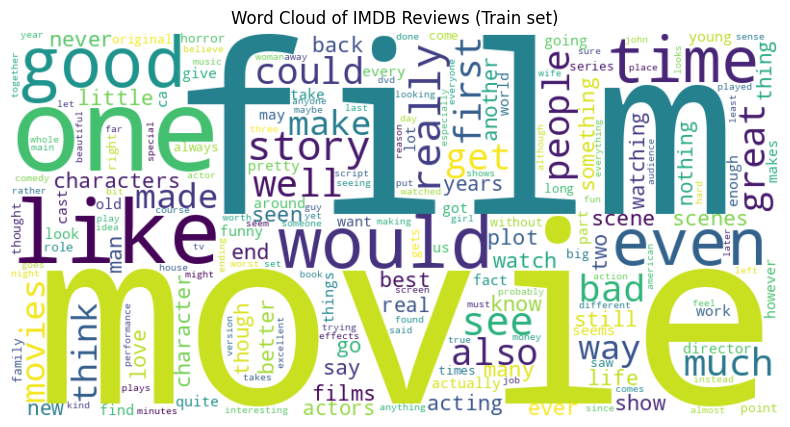

In [61]:
# Analyze train set
analyze_vocabulary(ds_train, "Train")

Analysis for Test dataset:
Total unique words: 95118

Most common words:
[('movie', 43233), ('film', 38859), ('one', 26133), ('like', 19435), ('would', 15247), ('good', 14279), ('even', 12138), ('time', 11920), ('see', 11399), ('really', 11337), ('story', 10935), ('well', 9752), ('much', 9474), ('could', 9147), ('get', 9058), ('great', 9027), ('bad', 8986), ('people', 8852), ('also', 8804), ('first', 8337)]


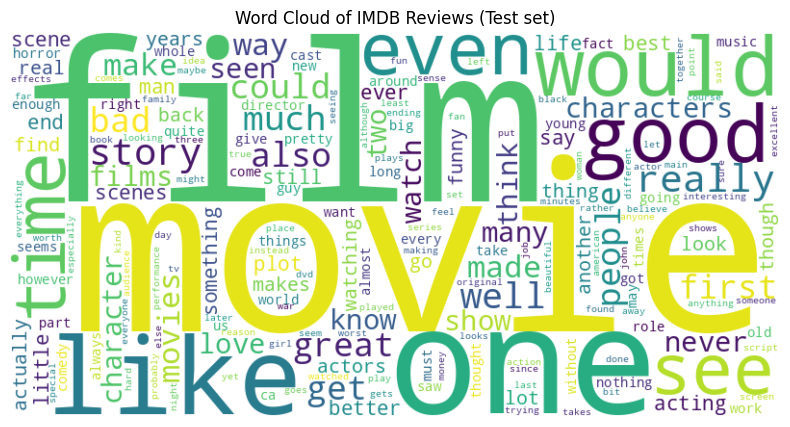

In [62]:
# Analyze test set
analyze_vocabulary(ds_test, "Test")

Both datasets show similar characteristics in the vocabulary analysis, suggesting that they are good for model training and evaluation.

In [63]:
ds_train.head()

,text,label,text_length,text_processed
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,1640,"[rented, curiousyellow, video, store, controve..."
1,"""I Am Curious: Yellow"" is a risible and preten...",0,1294,"[curious, yellow, risible, pretentious, steami..."
2,If only to avoid making this type of film in t...,0,528,"[avoid, making, type, film, future, film, inte..."
3,This film was probably inspired by Godard's Ma...,0,706,"[film, probably, inspired, godard, masculin, f..."
4,"Oh, brother...after hearing about this ridicul...",0,1814,"[oh, brother, hearing, ridiculous, film, umpte..."


In [64]:
#Save the data
ds_train.to_csv('/content/drive/MyDrive/Colab Notebooks/ds_train_data.csv', index=False)
ds_test.to_csv('/content/drive/MyDrive/Colab Notebooks/ds_test_data.csv', index=False)